# Neural Networks

## Step 1: Generate Synthetic Data

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

### Generating synthetic data

In [2]:
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

### Convert to DataFrame for easier manipulation

In [3]:
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

## Step 2: Preprocess the Data

In [4]:
from sklearn.model_selection import train_test_split

### Split the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

## Step 3: Build and Train the Neural Network

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-03-09 06:46:36.571152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 06:46:47.816578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Define the model

In [7]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

2024-03-09 06:47:00.121514: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Compile the model

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model

In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 [==============================] - 2s 2ms/step - loss: 0.6631 - accuracy: 0.4563
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.4750
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.5063
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.5750
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6187
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6625
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6812
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6938
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.6938
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.7312


## Step 4: Evaluate the Model

### Evaluate the model on the test set

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 7ms/step - loss: 0.6023 - accuracy: 0.7750
Test Accuracy: 0.7749999761581421


## Step 5: Visualizing Training Process

### Train the model and save the history

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6310 - accuracy: 0.7109 - val_loss: 0.5985 - val_accuracy: 0.7812
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 0.6280 - accuracy: 0.7266 - val_loss: 0.5951 - val_accuracy: 0.7812
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6247 - accuracy: 0.7344 - val_loss: 0.5921 - val_accuracy: 0.7812
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6215 - accuracy: 0.7344 - val_loss: 0.5888 - val_accuracy: 0.8125
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6182 - accuracy: 0.7500 - val_loss: 0.5853 - val_accuracy: 0.8125
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6150 - accuracy: 0.7578 - val_loss: 0.5816 - val_accuracy: 0.8438
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6116 - accuracy: 0.7656 - val_loss: 0.5777 - val_accuracy: 0.8438
Epoch 8/10
13/13 [=

### Plotting training and validation loss and accuracy

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

### Plot training & validation accuracy values

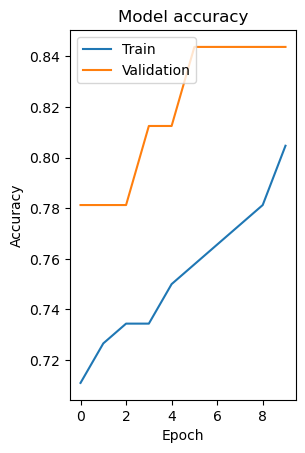

In [13]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

### Plot training & validation loss values

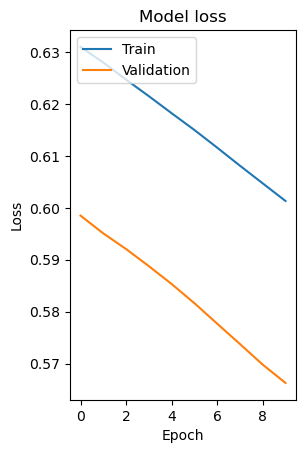

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Step 6: Creating the Visual

### Generate a grid over the feature space

In [15]:
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

### Predict over the grid

In [16]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

313/313 [==============================] - 0s 1ms/step


### Plot the contour and training examples

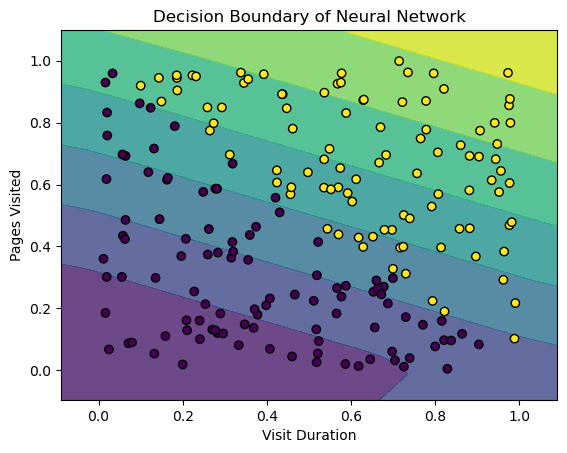

In [18]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()